1. Screen capture
2. Generate dataset and load it
3. Fit the model using SVC and calculate accuracy
4. Prediction of image drawn in paint

# Screen capture

In [ ]:
def one_time():
    # The pyscreenshot module can be used to copy the contents of the screen to a PIL or Pillow image memory
    # Replacement for the ImageGrab Module, which works on Windows only
    import pyscreenshot as ImageGrab
    import time
    images_folder = "captured_images/9/"
    for i in range(1,4):
        time.sleep(2.5)
        # PIL.ImageGrab.grab() method takes a snapshot of the screen. 
        # image from the screen starting at the coordinates (60, 170) on the screen and ending at the coordinates (400, 550)
        im = ImageGrab.grab(bbox=(60,170,400,550)) #x1, y1, x2, y2
        print("saved.......", i)
        # print(i, end=" ")
        # if(i%18==0):
        #     print()
        im.save(images_folder+str(i)+'.png')
        print("clear screen now and redraw now.......")


# Generate dataset

In [73]:
import cv2
import csv
import glob

header = ["label"]
for i in range(0, 784):
    header.append("pixel" + str(i))
with open('dataset.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)

for label in range(10):
    dirList = glob.glob("captured_images/"+str(label)+"/*.png")

    for img_path in dirList:
        # cv2.imread() method loads an image from the specified file.
        im = cv2.imread(img_path)
        # cv2.cvtColor() method is used to convert an image from one color space to another
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        # applying Gaussian blur to an image
        im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
        roi = cv2.resize(im_gray, (28,28), interpolation = cv2.INTER_AREA)

        data = []
        data.append(label)
        rows, cols = roi.shape

        ## Add pixel one by one into data array
        for i in range(rows):
            for j in range(cols):
                k = roi[i,j]
                if k > 100:
                    k = 1
                else:
                    k = 0
                data.append(k)
        with open('dataset.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)


# Load the dataset

In [74]:
import pandas as pd
from sklearn.utils import  shuffle

data = pd.read_csv('dataset.csv')

data = shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
258,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
877,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
971,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
727,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Separation of dependent and independent variable

In [76]:
X = data.drop(["label"], axis=1)
Y = data["label"]

# Preview of one image using matplotlib

3


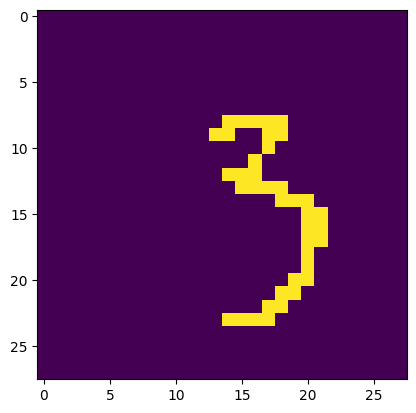

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 314
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

# Train-test split

In [84]:
from sklearn.model_selection import  train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)

# Fit the model using svc and also to save the model using joblib

In [86]:
# import joblib: Đây là một thư viện trong Python dùng để lưu trữ và tải các đối tượng Python, như các mô hình máy học đã được đào tạo.
import joblib
# SVC là một trong những thuật toán Support Vector Machine dùng để phân loại dữ liệu.
from sklearn.svm import SVC
#  sử dụng các hàm kernel để ánh xạ dữ liệu vào không gian cao chiều hơn để có thể tìm ra ranh giới phân chia tốt hơn trong không gian đó.
classifier = SVC(kernel="linear", random_state = 6)
classifier.fit(train_x, train_y)
# thư viện Joblib trong Python để lưu trữ mô hình phân loại (classifier) 
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

# Calculate accuracy

In [88]:
from sklearn import metrics
prediction = classifier.predict(test_x)
print("Accuracy=", metrics.accuracy_score(prediction, test_y))

Accuracy= 0.865


# Prediction of image drawn in paint

In [1]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab

model = joblib.load("model/digit_recognizer")
images_folder = "img/"

while True:
    img = ImageGrab.grab(bbox=(60,170,400,550))

    img.save(images_folder + "img.png")
    im = cv2.imread(images_folder+"img.png")
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    # applying Gaussian blur to an image
    im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)

    # Threshold the image
    # cv2.threshold là một hàm trong thư viện OpenCV trong Python được sử dụng để áp dụng phép ngưỡng hóa 
    # trên một ảnh xám (grayscale image). Hàm này nhận đầu vào là ảnh xám (im_gray) và áp dụng một ngưỡng 
    # để chuyển đổi ảnh thành ảnh nhị phân (cv2.THRESH_BINARY).
    # 100: Đây là giá trị ngưỡng. Tất cả các giá trị điểm ảnh lớn hơn 100 sẽ được chuyển đổi thành 255 (trắng).
    # 255: Giá trị tối đa được sử dụng sau khi áp dụng ngưỡng. Trong trường hợp này, nếu giá trị điểm ảnh lớn hơn ngưỡng, chúng sẽ được gán giá trị này (trắng).
    # cv2.THRESH_BINARY: Đây là loại ngưỡng hóa, trong trường hợp này, nó sẽ chuyển đổi ảnh thành ảnh nhị phân, tức là chỉ có hai giá trị điểm ảnh là 0 hoặc 255 (đen hoặc trắng).
    # ret: Là giá trị ngưỡng được sử dụng trong quá trình ngưỡng hóa. Trong trường hợp này, giá trị 100.
    # im_th: Là ảnh sau khi đã được áp dụng ngưỡng, tức là ảnh nhị phân, chỉ có hai màu đen và trắng, dựa trên ngưỡng được chỉ định.

    ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28,28), interpolation = cv2.INTER_AREA)
    rows, cols = roi.shape

    X = []

    ## Add pixel one bt one into data arry
    for i in range(rows):
        for j in range(cols):
            k = roi[i,j]
            if(k>100): k = 1
            else: k = 0
            X.append(k)
    
    predictions = model.predict([X])
    print("prediction:", predictions[0])
    cv2.putText(im, "prediction is: " + str(predictions[0]), (20,20), 0, 0.8, (0,255,0), 2, cv2.LINE_AA)

    cv2.startWindowThread()
    cv2.namedWindow("Result:")
    cv2.imshow("Result", im)
    cv2.waitKey(10000)
    ## 27 in ascii value of esc
    ## 13 is the ascii value enter
    if cv2.waitKey(1) == 13:
        break

cv2.destroyAllWindows()

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 0


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 0


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 1


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 1


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 2


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 1


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 3


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 7


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 1


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 3


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 3


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 6


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 2


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 9


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 3


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 7


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 7


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 7


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 0


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


prediction: 0


KeyboardInterrupt: 